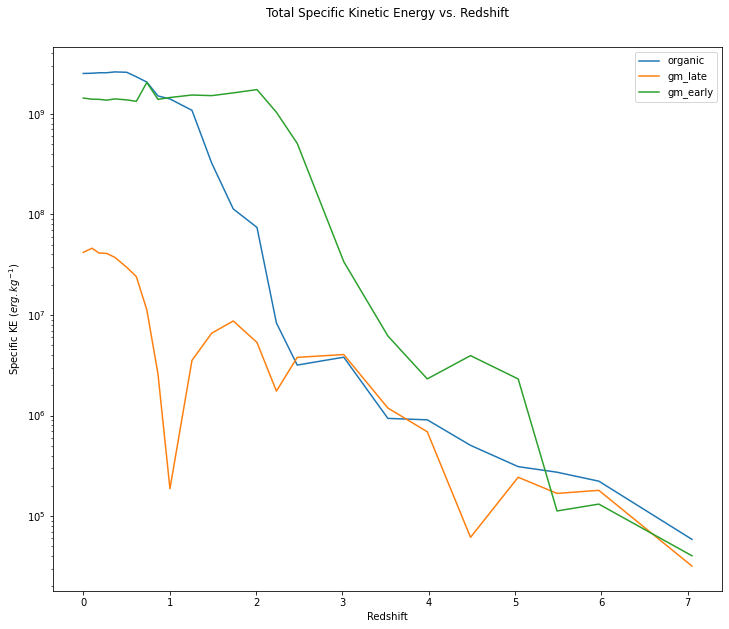

In [20]:
import h5py
import matplotlib.pyplot as plt
from os import listdir
import matplotlib.gridspec as gridspec
import numpy as np
import re

# axis scale sets the maximum value on the axes
axisScale = 0.03

datasets = ['organic', 'gm_late', 'gm_early']
datasetNo = 0

# define storage arrays and reshape to hold all three galaxy type data
redshifts = np.array(range(3*24), dtype=float)
redshifts.shape = (3, 24)
specificKes = np.array(range(3*24), dtype=float)
specificKes.shape = (3, 24)

for dataset in datasets:
	
	files = listdir('data/' + dataset)

	count = 0
	
	for file in files:
	   
		# get redshift from the filename
		m = re.search('(z[0-9])\w+', file)
		s = m.group(0).replace('z', '')
		s = s.replace('p', '.')
		redshift = float(s)
		
		# load data for a particular galaxy at a particular redshift
		f = h5py.File('data/' + dataset + '/' + file,'r')

		# extract data from the file
		ds_c = f['Coordinates']
		ds_v = f['Velocity']
		ds_m = f['Mass']

		# Get magnitudes of the vectors
		vel_magnitude = np.linalg.norm(ds_v, axis=1)

		# Calculate kinetic energy for all star particles
		specificKe = np.sum(0.5 * np.square(vel_magnitude))

		# Store values for plotting later
		redshifts[datasetNo, count] = redshift
		specificKes[datasetNo, count] = specificKe

		# Next redshift value
		count = count + 1

	# Next galaxy
	datasetNo = datasetNo + 1

plt.figure(figsize = (12,10))
plt.title('Total Specific Kinetic Energy vs. Redshift', pad=30)
plt.xlabel('Redshift')
plt.ylabel('Specific KE ($erg.g^{-1}$)')
plt.ticklabel_format(axis='y', style='sci', useMathText=True)
plt.semilogy()
for i in range(0,3):
	plt.plot(redshifts[i,0:], specificKes[i,0:])
plt.legend(['organic', 'gm_late', 'gm_early'])
plt.show()   

